In [14]:
!pip install -q git+https://github.com/snap-stanford/deepsnap.git

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21.3 MB 61.5 MB/s eta 0:00:00


In [21]:
!pip install torch-geometric

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 12.4 MB/s eta 0:00:00


In [23]:

!pip install torch-scatter -f https://pytorch-geometric.com/whl/torch-2.0.1+cu118.html
!pip install torch-sparse -f https://pytorch-geometric.com/whl/torch-2.0.1+cu118.html
!pip install torch-geometric
#!pip install -q git+https://github.com/snap-stanford/deepsnap.git
!pip install -U -q PyDrive

Looking in links: https://pytorch-geometric.com/whl/torch-2.0.1+cu118.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 40.4 MB/s eta 0:00:00
Looking in links: https://pytorch-geometric.com/whl/torch-2.0.1+cu118.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 35.2 MB/s eta 0:00:00


In [ ]:
!nvcc --version      #Nvidia version
!python -c "import torch; print(torch.version.cuda)"    #Running shell scripts

In [15]:
import torch
# import torch_geometric

print(torch.__version__)
#print(torch_geometric.__version__)

2.3.1+cu121


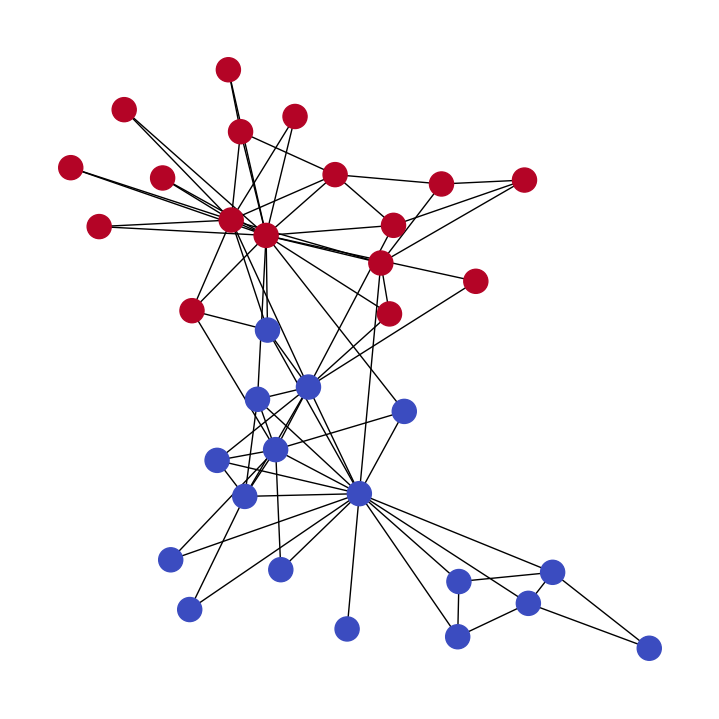

In [16]:
#Assigning different node colors based on type (node_type)
import copy
import networkx as nx
from networkx.algorithms.community import greedy_modularity_communities
import matplotlib.pyplot as plt
from pylab import show

G = nx.karate_club_graph()
community_map = {}
for node in G.nodes(data=True):
  if node[1]["club"] == "Mr. Hi":
    community_map[node[0]] = 0        #take only the number
  else:
    community_map[node[0]] = 1

color_map = {0:0, 1:1}
node_color = [color_map[community_map[node]] for node in community_map.keys()]
pos = nx.spring_layout(G)

plt.figure(figsize=(7, 7))
nx.draw(G, pos=pos, cmap=plt.get_cmap("coolwarm"), node_color=node_color)
show()

In [17]:
def assign_node_types(G, community_map):
  node_trans = {0:"n0", 1:"n1"}
  node_type = {node:node_trans[community_map[node]] for node in G.nodes()}
  nx.classes.function.set_node_attributes(G, node_type, "node_type")

def assign_node_label(G, community_map):
  nx.classes.function.set_node_attributes(G, community_map, "node_label")

def assign_node_features(G, community_map):       #assigning node features to each node, same feature
  nx.classes.function.set_node_attributes(G, torch.ones(5), "node_features")

assign_node_types(G, community_map)
assign_node_label(G, community_map)
assign_node_features(G, community_map)
G.nodes(data=True)[10]

{'club': 'Mr. Hi',
 'node_type': 'n0',
 'node_label': 0,
 'node_features': tensor([1., 1., 1., 1., 1.])}

In [18]:
def assign_edge_types(G, community_map):


  edges = G.edges

  def _get_label(edge):
    label = "e0"
    if all([community_map[edge[0]], community_map[edge[1]]]):   #if both one
      return "e1"
    if any([community_map[edge[0]], community_map[edge[1]]]):     #if any is one
      return "e2"
    return label
  edge_label_map = {edge: _get_label(edge) for edge in edges}
  nx.classes.function.set_edge_attributes(G, edge_label_map, "edge_type")

assign_edge_types(G, community_map)
edge_idx = 15
n1=0
n2=31
edge = list(G.edges(data=True))[edge_idx]
edge




(0, 31, {'weight': 2, 'edge_type': 'e2'})

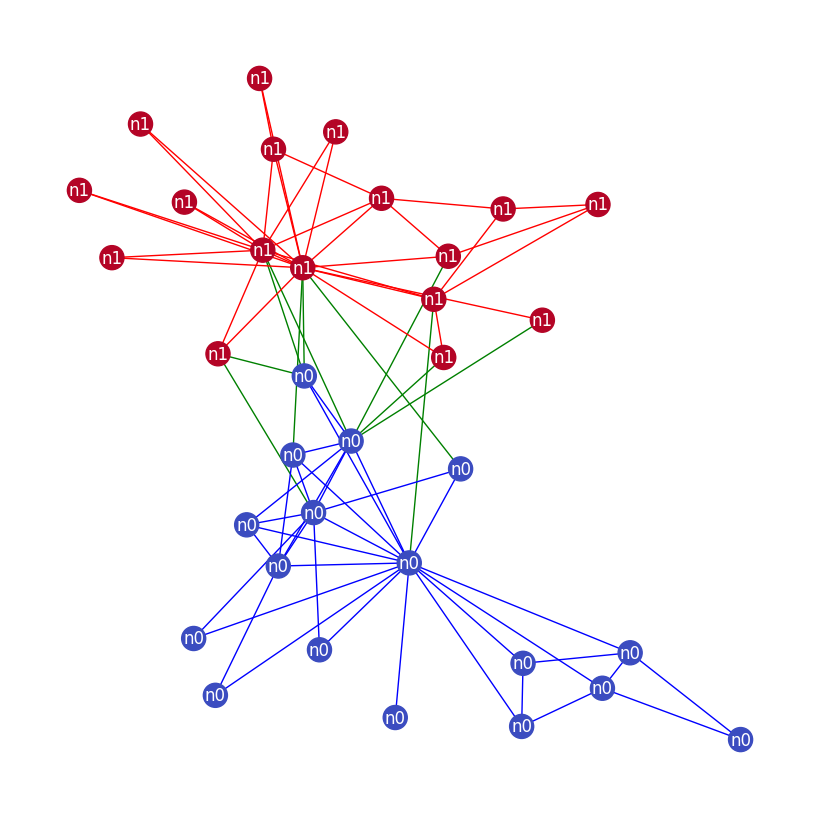

In [19]:
#Heterogeneous Graph Visualization
edge_color = {}
for edge in G.edges():
  n1, n2 = edge
  edge_color[edge] = community_map[n1] if community_map[n1] == community_map[n2] else 2
  if community_map[n1] == community_map[n2] and community_map[n1] == 0:
    edge_color[edge] = 'blue'
  elif community_map[n1] == community_map[n2] and community_map[n1] == 1:
    edge_color[edge] = 'red'
  else:
    edge_color[edge] = 'green'

G_orig = copy.deepcopy(G)
nx.classes.function.set_edge_attributes(G, edge_color, name='color')
colors = nx.get_edge_attributes(G,'color').values()
labels = nx.get_node_attributes(G, 'node_type')
plt.figure(figsize=(8, 8))
nx.draw(G, pos=pos, cmap=plt.get_cmap('coolwarm'), node_color=node_color, edge_color=colors, labels=labels, font_color='white')
show()

In [24]:
#Transforming Networkx graph to deepsnap
from deepsnap.hetero_graph import HeteroGraph

hete = HeteroGraph(G_orig)

In [25]:
#node properties are ~same with those in networkx
def get_nodes_per_type(hete):
  num_node_n0 = len(hete.node_type["n0"])
  num_node_n1 = len(hete.node_type["n1"])
  return num_node_n0, num_node_n1

get_nodes_per_type(hete)

(17, 17)

In [31]:
hete

HeteroGraph(G=[], club=[], edge_index=[], edge_label_index=[], edge_to_graph_mapping=[], edge_to_tensor_mapping=[78], edge_type=[], name=[], node_features=[], node_label=[], node_label_index=[], node_to_graph_mapping=[], node_to_tensor_mapping=[34], node_type=[], weight=[])

In [32]:
hete.node_type, hete.edge_type

({'n0': ['n0',
   'n0',
   'n0',
   'n0',
   'n0',
   'n0',
   'n0',
   'n0',
   'n0',
   'n0',
   'n0',
   'n0',
   'n0',
   'n0',
   'n0',
   'n0',
   'n0'],
  'n1': ['n1',
   'n1',
   'n1',
   'n1',
   'n1',
   'n1',
   'n1',
   'n1',
   'n1',
   'n1',
   'n1',
   'n1',
   'n1',
   'n1',
   'n1',
   'n1',
   'n1']},
 {('n0', 'e0', 'n0'): ['e0',
   'e0',
   'e0',
   'e0',
   'e0',
   'e0',
   'e0',
   'e0',
   'e0',
   'e0',
   'e0',
   'e0',
   'e0',
   'e0',
   'e0',
   'e0',
   'e0',
   'e0',
   'e0',
   'e0',
   'e0',
   'e0',
   'e0',
   'e0',
   'e0',
   'e0',
   'e0',
   'e0',
   'e0',
   'e0',
   'e0',
   'e0',
   'e0',
   'e0',
   'e0'],
  ('n0', 'e2', 'n1'): ['e2',
   'e2',
   'e2',
   'e2',
   'e2',
   'e2',
   'e2',
   'e2',
   'e2',
   'e2',
   'e2'],
  ('n1', 'e1', 'n1'): ['e1',
   'e1',
   'e1',
   'e1',
   'e1',
   'e1',
   'e1',
   'e1',
   'e1',
   'e1',
   'e1',
   'e1',
   'e1',
   'e1',
   'e1',
   'e1',
   'e1',
   'e1',
   'e1',
   'e1',
   'e1',
   'e1',
   'e

In [33]:
def get_nodes_per_type(hete):

  num_nodes_n0 = 0
  num_nodes_n1 = 0

  num_nodes_n0 = len(hete.node_type['n0'])
  num_nodes_n1 = len(hete.node_type['n1'])

  return num_nodes_n0, num_nodes_n1

get_nodes_per_type(hete)

(17, 17)

In [34]:
def get_num_message_edges(hete):

  message_type_edges = []

  message_type_edges = [(x,len(y)) for x, y in hete.edge_type.items()]


  return message_type_edges

get_num_message_edges(hete)

[(('n0', 'e0', 'n0'), 35), (('n0', 'e2', 'n1'), 11), (('n1', 'e1', 'n1'), 32)]

In [35]:
from deepsnap.dataset import GraphDataset

def compute_dataset_split_counts(datasets):
  data_set_splits = {}

  data_set_splits = {p: sum(x.size(0) for x in y[0].node_label_index.values()) for p, y in datasets.items()}


  return data_set_splits

dataset = GraphDataset([hete], task='node')
# Splitting the dataset
dataset_train, dataset_val, dataset_test = dataset.split(transductive=True, split_ratio=[0.4, 0.3, 0.3])
datasets = {'train': dataset_train, 'val': dataset_val, 'test': dataset_test}

data_set_splits = compute_dataset_split_counts(datasets)
for dataset_name, num_nodes in data_set_splits.items():
  print("{} dataset has {} nodes".format(dataset_name, num_nodes))

train dataset has 12 nodes
val dataset has 10 nodes
test dataset has 12 nodes


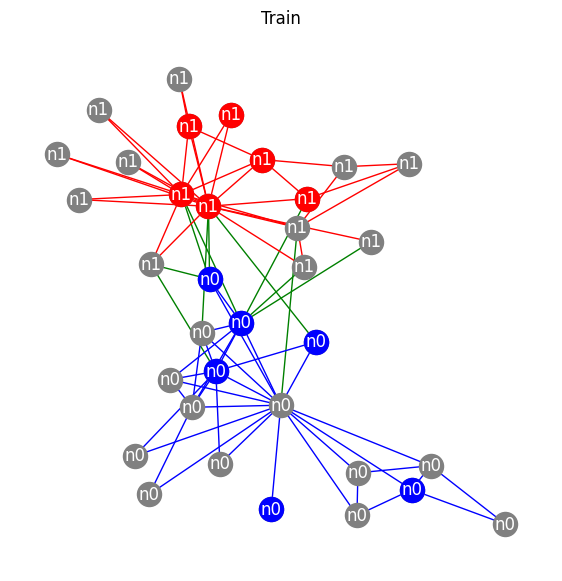

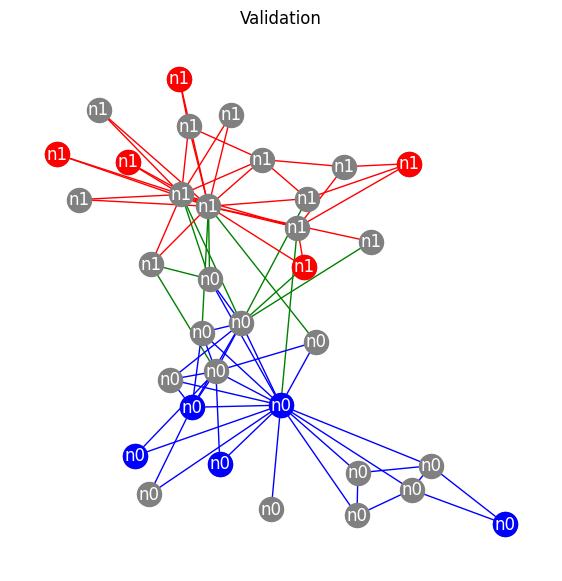

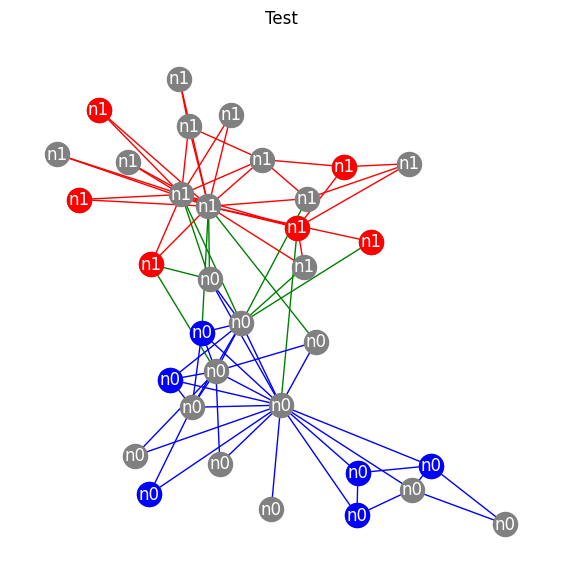

In [36]:
from deepsnap.dataset import GraphDataset

dataset = GraphDataset([hete], task='node')
# Splitting the dataset
dataset_train, dataset_val, dataset_test = dataset.split(transductive=True, split_ratio=[0.4, 0.3, 0.3])
titles = ['Train', 'Validation', 'Test']

for i, dataset in enumerate([dataset_train, dataset_val, dataset_test]):
  n0 = hete._convert_to_graph_index(dataset[0].node_label_index['n0'], 'n0').tolist()
  n1 = hete._convert_to_graph_index(dataset[0].node_label_index['n1'], 'n1').tolist()

  plt.figure(figsize=(7, 7))
  plt.title(titles[i])
  nx.draw(G_orig, pos=pos, node_color="grey", edge_color=colors, labels=labels, font_color='white')
  nx.draw_networkx_nodes(G_orig.subgraph(n0), pos=pos, node_color="blue")
  nx.draw_networkx_nodes(G_orig.subgraph(n1), pos=pos, node_color="red")
  show()

In [37]:
data = dataset[0]
data

HeteroGraph(G=[], club=[], edge_index=[], edge_label_index=[], edge_to_graph_mapping=[], edge_to_tensor_mapping=[78], edge_type=[], name=[], node_features=[], node_label=[], node_label_index=[], node_to_graph_mapping=[], node_to_tensor_mapping=[34], node_type=[], task=[], weight=[])

In [39]:
for h in hete.node_type:
  print(h)

n0
n1


In [ ]:
#imports
import copy
import torch
import deepsnap
import numpy as np
import torch.nn as nn
import torch.nn.functional as F
import torch_geometric.nn as pyg_nn

from sklearn.metrics import f1_score
from deepsnap.hetero_gnn import forward_op
from deepsnap.hetero_graph import HeteroGraph
from torch_sparse import SparseTensor, matmul

In [ ]:
#Authentication to PyDrive

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
#obtaining dataset as a pickle file(serialized object)
id='1ivlxd6lJMcZ9taS44TMGG72x2V1GeVvk'
downloaded = drive.CreateFile({'id': id})
downloaded.GetContentFile('acm.pkl')

In [ ]:
#returns a dictionary of updated node messages
class HeteroGNNConv(pyg_nn.MessagePassing):
    def __init__(self, in_channels_src, in_channels_dst, out_channels):
        super(HeteroGNNConv, self).__init__(aggr="mean")

        self.in_channels_src = in_channels_src
        self.in_channels_dst = in_channels_dst
        self.out_channels = out_channels
        #Linear Transformation
        self.lin_dst = nn.Linear(in_channels_dst, out_channels)
        self.lin_src = nn.Linear(in_channels_src, out_channels)
        self.lin_update = nn.Linear(out_channels * 2, out_channels)

    def forward(
        self,
        node_feature_src,
        node_feature_dst,
        edge_index,
        size=None
    ):

        return self.propagate(node_feature_src=node_feature_src, node_feature_dst=node_feature_dst,
                              edge_index=edge_index, size=size)

    def message_and_aggregate(self, edge_index, node_feature_src):

        out = matmul(node_feature_src, edge_index, reduce=self.aggr)   #aggregation like torch_scatter.scatter
        return out

    def update(self, aggr_out, node_feature_dst):

       aggr_out = self.lin_src(aggr_out)
       node_feature_dst = self.lin_dst(node_feature_dst)
       concat_fea = torch.cat([aggr_out, node_feature_dst], dim=-1)
       aggr_out = self.lin_update(concat_fea)

       return aggr_out

In [5]:
import torch
a = torch.tensor([[1,2,3,3,4],[2,3,5,6,7]])
b = torch.unique(a, dim=0)
b

tensor([[1, 2, 3, 3, 4],
        [2, 3, 5, 6, 7]])

In [ ]:
#torch implementation
class HeteroGNNConvP(nn.Module):
    def __init__(self, in_channels_src, in_channels_dst, out_channels):
        super(HeteroGNNConv, self).__init__()
        self.in_channels_src = in_channels_src
        self.in_channels_dst = in_channels_dst
        self.out_channels = out_channels

        # Linear transformations
        self.lin_dst = nn.Linear(in_channels_dst, out_channels)
        self.lin_src = nn.Linear(in_channels_src, out_channels)
        self.lin_update = nn.Linear(out_channels * 2, out_channels)


    def forward(self, node_feature_src, node_feature_dst, edge_index):
        aggr_out = self.message_and_propagate(edge_index, node_feature_src)
        output = self.update(aggr_out, node_feature_dst)
        return output

    def message_and_propagate(self, edge_index, node_feature_src):
        # Perform sparse matrix multiplication
        return matmul(edge_index, node_feature_src, reduce='mean')

    def update(self, aggr_out, node_feature_dst):
        aggr = self.lin_src(aggr_out)
        dst_tran = self.lin_dst(node_feature_dst)
        return self.lin_update(torch.cat([aggr, dst_tran], dim=1))

#NB: self.convs from deepsnap is a module dict. i.e within the HeteroGNNWrapper
"""
output = torch.unique(aggre_out, node_feature_dst)
self.convs = nn.ModuleDict([node_type:HeteroGNNConvP(...) for node_type in output])

In [ ]:
class HeteroGNNWrapperConv(deepsnap.hetero_gnn.HeteroConv):
    def __init__(self, convs, args, aggr="mean"):
        super(HeteroGNNWrapperConv, self).__init__(convs, None)
        self.aggr = aggr

        # Map the index and message type
        self.mapping = {}

        # A numpy array that stores the final attention probability
        self.alpha = None

        self.attn_proj = None

        if self.aggr == "attn":
            self.attn_proj = nn.Sequential(nn.Linear(args['hidden_size'],args['attn_size']),#Wattn^(l)*hv^(l)+b
                                           nn.Tanh(),
                                           nn.Linear(args['attn_size'],1,bias = False))#qattn

    def reset_parameters(self):
        super(HeteroConvWrapper, self).reset_parameters()
        if self.aggr == "attn":
            for layer in self.attn_proj.children():
                layer.reset_parameters()

    def forward(self, node_features, edge_indices):#edge_indices:{(s1,m1,d1):SparseTensor}
        message_type_emb = {}
        for message_key, edge_index in edge_indices.items():
            src_type, edge_type, dst_type = message_key
            node_feature_src = node_features[src_type] #source node features eg(num_n0, num_feat)
            node_feature_dst = node_features[dst_type] #destination node features eg(num_n1, num_feat)
            message_type_emb[message_key] = (
                self.convs[message_key](
                    node_feature_src=node_feature_src,
                    node_feature_dst=node_feature_dst,
                    edge_index=edge_index
                )
            )
            node_emb = {dst: [] for _,_, dst in message_type_emb.keys()}   #dst_type from message_key
            mapping = {}
            for (src, edge_type_dst), item in message_type_emb.items():
              mapping[len((node_emb[dst]))] = (src, edge_type_dst)
              node_emb[dst].append(item)
            self.mapping = mapping
            for node_type, embs in node_emb.items():
              if len(embs) == 1:
                node_emb[node_type] = embs[0]
              else:
                node_emb[node_type] = self.aggregate(embs)
        return node_emb

    def aggregate(self, xs):
      if self.aggr == "mean":
        return torch.stack(xs, dim=0).mean(dim=0) #mean0 because all nodes in stack are of same type shape(features), else keepdim=True
      elif self.aggr == "attn":
        N = xs[0].size(0)
        M = len(xs)
        x = torch.stack(xs, dim=0).view(M, N, -1) #M,N,D
        z = self.attn_proj(x).squeeze(-1).mean(dim=1) # M
        alpha = torch.softmax(z)

        #store the attention results as a numpy array
        self.aggr = alpa.detach().cpu().numpy()

        alpha = alpha.view(M, 1, 1)    #importance of each neighbor
        x = x * alpha     #M,N,D
        return x.sum(dim=0)    #N,



'''
we can define our own wrapper from scratch inheriting from nn.Module, we'll
just need to define our self.conv as an nn.ModuleDict object of HeteroGNNConv
for each node_type in instantiation of during the forward
'''
#Or we can just define a function that does it instead below

In [13]:
#implement the dictionary function
def generate_convs(hetero_graph, conv, hidden_size, first_layer=False):
  convs = {}

  for message_type in hetero_graph.message_types:
    node_feature_src, node_features_dest = hetero_graph.num_node_features(message_type[0]), hetero_graph.num_node_features(message_type[-1])
    if first_layer:
      gnn = conv(node_features_src, node_features_dest, hidden_size)
    else:
      gnn = conv(node_features_src, node_features_dest, hidden_size)
    convs.update({message_type: gnn})
  return convs

(tensor([[0.3577, 0.3785, 0.1597, 0.3609, 0.7743],
         [0.2290, 0.9982, 0.4009, 0.2718, 0.4370],
         [0.8404, 0.4794, 0.5563, 0.7385, 0.3038],
         [0.8761, 0.5742, 0.5259, 0.9914, 0.4884]]),
 tensor([0.4062, 0.4674, 0.5837, 0.6912]))

In [ ]:
'''HeteroGNN model'''
class HeteroGNN(nn.Module):
  def __init__(self, hetero_graph, args, aggr="mean"):
    super().__init__()

    self.aggr = aggr
    self.hidden_size = args["hidden_size"]

    self.bns1 = nn.ModuleDict()
    self.bns2 = nn.ModuleDict()
    self.relus1 = nn.ModuleDict()
    self.relus2 = nn.ModuleDict()
    self.post_mps = nn.ModuleDict()


    self.convs1 = generate_convs(hetero_graph, HeteroGNNConv, args["hidden_size"], True)
    self.convs1 = HeteroGNNWrapperConv(self.convs1, args, self.aggr)
    self.convs2 = generate_convs(hetero_graph, HeteroGNNConv, args["hidden_size"])
    self.convs2 = HeteroGNNWrapperConv(self.convs2, args, self.aggr)

    for node_type in hetero_graph.node_types:
      self.bns1.update({node_type: nn.BatchNorm1d(args["hidden_size"], eps=1)})
      self.bns2.update({node_type: nn.BatchNorm1d(args["hidden_size"], eps=1)})
      self.relus1.update({node_type: nn.LeakyReLU()})
      self.relus2.update({node_type: nn.LeakyReLU()})
      self.post_mps.update(
          {node_type: nn.Linear(args["hidden_size"], hetero_graph.num_node_label(node_type))}
      ) # here num_node_label = 1 but eg a protein can have different types.


  def forward(self, node_feature, edge_index):  #takes in the dataset
    x = node_feature
    x = self.convs1(x, edge_index)  #output is a dict of node types
    x = forward_op(x, self.bns1)
    x = forward_op(x, self.relus1)
    x = self.convs2(x, edge_index)
    x = forward_op(x, self.bns2)
    x = forward_op(x, self.relus2)
    x = forward_op(x, self.post_mps)
    return x

  def loss(self, preds, y, indices):
    loss = 0
    loss_func = F.cross_entropy

    for node_type in preds.keys():
      idx = indices[node_type]
      loss += loss_func(preds[node_type][idx], y[node_type][idx])
    return loss

  # def forward_op(self, x, module_dict, **kwargs):
  #   res = {}
  #   for key in x:
  #     res[key] = module_dict[key](x[key], **kwargs)
  #   return res


In [ ]:
#Training and Test functions
import pands as pd
def train(model, optimizer, hetero_graph, train_idx):
  model.train()
  optimizer.zero_grad()
  preds = model(hetero_graph.node_features, hetero_graph.edge_index)

  loss = model.loss(preds, hetero_graph.node_label, train_idx)
  loss.backward()
  optimizer.step()
  return loss.item()

def test(model, graph, best_model=None, best_val=0, save_preds=False, agg_type=None): #indices:[train_idx],[val_idx], ...
  model.eval()
  accs = []
  for i, index in enumerate(indices):
    preds = model(graph.node_feature, graph.edge_index)
    num_node_types = 0
    micro = 0
    macro = 0
    for node_type in preds:
      idx = index[node_type]
      pred = preds[node_type][idx]
      pred = pred.max(1)[1]    #max returns (max_value, index) hence the indexing
      label_np = graph.node_label[node_type][idx].detach().cpu().numpy()
      pred_np = pred.cpu().numpy() #we are not using pred for anything else hence we didn't detach(). detach creates a new memory for tensor
      micro += f1_score(label_np, pred_np, average="micro")
      macro += f1_score(label_np, pred_np, average="macro")
      num_node_types += 1

    #average the f1 scores
    micro /= num_node_types
    macro /= num_node_types
    accs.append((micro, macro))


    #saving the test pred and labels
    if save_preds and i == 2:   #2 is test_split
      print("Saving Hetro Node prediction results with Agg:", agg_type)

      data = {}
      data['pred'] = pred_np
      data['label'] = label_np

      df = pd.DataFrame(data=data)
      df.to_csv(f"ACM-Node-{agg_type}-preds.csv", sep=',', index=False)

  if accs[1][0] > best_val:  #[1] because val is the 1 index
    best_val = accs[1][0]
    best_model = copy.deepcopy(model)
  return accs, best_model, best_val




In [ ]:
args = {
    "device": torch.device("cuda" if torch.cuda.is_available() else "cpu"),
    "hidden-size": 64,
    "epochs": 100,
    "weight_decay": 1e-5,
    "lr": 0.003,
    "attn_size": 32,
}

In [ ]:
#utilizing the ACM data and simplifyng to one node type and two relation types
#message (paper, author, paper) and (paper, subject_matter, paper)

#Load data
data = torch.load("acm.pk1")

#Message types
message_type_1 = ("paper", "author", "paper")
message_type_2 = ("paper", "author", "paper")

#Dictionary of edge indices
edge_index = {}
edge_index[message_type_1] = data['pap']
edge_index[message_type_2] = data['pap']

#Dictionary of node features
node_feature = {}
node_feature["paper"] = data['label']

#Dictionary of node features
node_label = {}
node_label["paper"] = data["label"]

#load train, val and test indices
train_idx = {"paper": data['train_idx'].to(args["device"])}
val_idx = {"paper": data['val_idx'].to(args["device"])}
test_idx = {"paper": data["test_idx"].to(args["device"])}


#construct the deepsnap tensor backend HeteroGraph
hetero_graph = HeteroGraph(
    node_feature=node_feature,
    node_label=node_label,
    edge_index=edge_index,
    directed=True
)

print(f"ACM heterogeneous graph: {hetero_graph.num_nodes()} nodes, {hetero_graph.num_edges()} edges")

#Node Feature and label to device
for key in hetero_graph.node_feature:
  hetero_graph.node_feature[key] = hetero_graph.node_feature[key].to(args["device"])
for key in hetero_graph.node_label:
  hetero_graph.node_label[key] = hetero_graph.node_label[key].to(args['device'])

# Edge_index to SparseTensor and to device
for key in hetero_graph.edge_index:
  edge_index = hetero_graph.edge_index[key]
  adj = SparseTensor(row=edge_index[0], col=edge_index[1], sparse_sizes=(hetero_graph.num_nodes("paper"),
                                                                         hetero_graph.num_nodes("paper"))) # only for paper
  hetero_graph.edge_index[key] = adj.t().to(args["device"])
print(hetero_graph.edge_index[message_type_1])
print(hetero_graph.edge_index[message_type_2])

In [ ]:
# Start the training

best_model = None
best_val = 0

model = HeteroGNN(hetero_graph, args, aggr="mean").to(args["device"])
optimizer = torch.optim.Adam(model.parameters(), lr=args["lr"], weight_decay=args["weight_decay"])

for epoch in range(args["epochs"]):
  loss = train(model, optimizer, hetero_graph, train_idx)
  accs, best_model, best_val = test(model, hetero_graph, [train_idx, val_idx, test_idx],
                                    best_model, best_val)
  print(
          f"Epoch {epoch + 1}: loss {round(loss, 5)}, "
          f"train micro {round(accs[0][0] * 100, 2)}%, train macro {round(accs[0][1] * 100, 2)}%, "
          f"valid micro {round(accs[1][0] * 100, 2)}%, valid macro {round(accs[1][1] * 100, 2)}%, "
          f"test micro {round(accs[2][0] * 100, 2)}%, test macro {round(accs[2][1] * 100, 2)}%"
      )
  best_accs, _, _ = test(best_model, hetero_graph, [train_idx, val_idx, test_idx],
                         save_preds=True, agg_type="mean")
  print(
      f"Best model: "
      f"train micro {round(best_accs[0][0] * 100, 2)}%, train macro {round(best_accs[0][1] * 100, 2)}%, "
      f"valid micro {round(best_accs[1][0] * 100, 2)}%, valid macro {round(best_accs[1][1] * 100, 2)}%, "
      f"test micro {round(best_accs[2][0] * 100, 2)}%, test macro {round(best_accs[2][1] * 100, 2)}%"
  )



In [ ]:
# Start the training attn model

best_model = None
best_val = 0

output_size = hetero_graph.num_node_labels("paper")
model = HeteroGNN(hetero_graph, args, aggr="attn").to(args["device"])
optimizer = torch.optim.Adam(model.parameters(), lr=args["lr"], weight_decay=args["weight_decay"])

for epoch in range(args["epochs"]):
  loss = train(model, optimizer, hetero_graph, train_idx)
  accs, best_model, best_val = test(model, hetero_graph, [train_idx, val_idx, test_idx],
                                    best_model, best_val)
  print(
          f"Epoch {epoch + 1}: loss {round(loss, 5)}, "
          f"train micro {round(accs[0][0] * 100, 2)}%, train macro {round(accs[0][1] * 100, 2)}%, "
          f"valid micro {round(accs[1][0] * 100, 2)}%, valid macro {round(accs[1][1] * 100, 2)}%, "
          f"test micro {round(accs[2][0] * 100, 2)}%, test macro {round(accs[2][1] * 100, 2)}%"
      )
  best_accs, _, _ = test(best_model, hetero_graph, [train_idx, val_idx, test_idx],
                         save_preds=True, agg_type="Attention")
  print(
      f"Best model: "
      f"train micro {round(best_accs[0][0] * 100, 2)}%, train macro {round(best_accs[0][1] * 100, 2)}%, "
      f"valid micro {round(best_accs[1][0] * 100, 2)}%, valid macro {round(best_accs[1][1] * 100, 2)}%, "
      f"test micro {round(best_accs[2][0] * 100, 2)}%, test macro {round(best_accs[2][1] * 100, 2)}%"
  )

In [ ]:
#print the attn score per message to see which the model prioritized
if model.convs1.alpha is not None and model.convs2.alpha is not None:
  for idx, message_type in model.convs1.mapping.item():
    print(f"layer 1 has attention {model.convs1.alpha[idx]} on message type {message_type}")
  for idx, message_type in model.convs2.mapping.items():
    print(f"layer 2 has attention {model.convs2.alpha[idx]} on message type {message_type}")